# Predicting Diabetes Outcomes

This project is intended to develop a model that predicts whether a patient will develop diabetes.

**Skills used in this project:**
* Data Processing/Data Cleaning
* Visualizations
* Model Building
* Model Evaluation

**Sections:**
1. Data Processing
2. Exploratory Analysis
3. Model Building & Evaluation

In [3]:
#install packages
install.packages("randomForest")
install.packages("corrplot")
install.packages("rpart.plot")
install.packages("caret")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("dplyr")

#load packages
library(tidyverse)
library(rpart)
library(randomForest)
library(ggplot2)
library(corrplot)
library(caret)
library(rpart.plot)
library(dplyr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.1

Type r

In [4]:
diabetes_data <- read_csv("Healthcare-Diabetes.csv")

Rows: 2768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): Id, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(diabetes_data)

Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


## Data Processing

First, we need to see if there's any missing data in our dataset

In [6]:
sum(is.na(diabetes_data))

[1] 0

In [7]:
summary(diabetes_data)

       Id          Pregnancies        Glucose      BloodPressure   
 Min.   :   1.0   Min.   : 0.000   Min.   :  0.0   Min.   :  0.00  
 1st Qu.: 692.8   1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00  
 Median :1384.5   Median : 3.000   Median :117.0   Median : 72.00  
 Mean   :1384.5   Mean   : 3.743   Mean   :121.1   Mean   : 69.13  
 3rd Qu.:2076.2   3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00  
 Max.   :2768.0   Max.   :17.000   Max.   :199.0   Max.   :122.00  
 SkinThickness       Insulin            BMI        DiabetesPedigreeFunction
 Min.   :  0.00   Min.   :  0.00   Min.   : 0.00   Min.   :0.0780          
 1st Qu.:  0.00   1st Qu.:  0.00   1st Qu.:27.30   1st Qu.:0.2440          
 Median : 23.00   Median : 37.00   Median :32.20   Median :0.3750          
 Mean   : 20.82   Mean   : 80.13   Mean   :32.14   Mean   :0.4712          
 3rd Qu.: 32.00   3rd Qu.:130.00   3rd Qu.:36.62   3rd Qu.:0.6240          
 Max.   :110.00   Max.   :846.00   Max.   :80.60   Max.   :2.4200   

Since we have no missing data as "NA", we should check the data to see if any of the data has a 0. A 0 for some of these variables don't make sense, like Blood Pressure and Skin Thickness so let's exclude those from the dataset. 

In [8]:
diabetes_data_final <- diabetes_data %>%
  filter(BloodPressure != 0, SkinThickness != 0, BMI != 0, Age != 0)


In [9]:
summary(diabetes_data_final)

       Id          Pregnancies        Glucose    BloodPressure   
 Min.   :   1.0   Min.   : 0.000   Min.   :  0   Min.   : 24.00  
 1st Qu.: 701.2   1st Qu.: 1.000   1st Qu.: 98   1st Qu.: 64.00  
 Median :1382.5   Median : 2.000   Median :115   Median : 72.00  
 Mean   :1386.8   Mean   : 3.441   Mean   :120   Mean   : 71.62  
 3rd Qu.:2076.8   3rd Qu.: 5.000   3rd Qu.:141   3rd Qu.: 80.00  
 Max.   :2768.0   Max.   :17.000   Max.   :199   Max.   :110.00  
 SkinThickness      Insulin           BMI        DiabetesPedigreeFunction
 Min.   : 7.00   Min.   :  0.0   Min.   :18.20   Min.   :0.0850          
 1st Qu.:22.00   1st Qu.:  0.0   1st Qu.:28.00   1st Qu.:0.2590          
 Median :29.00   Median : 90.0   Median :32.90   Median :0.4150          
 Mean   :29.24   Mean   :113.1   Mean   :33.06   Mean   :0.4997          
 3rd Qu.:36.00   3rd Qu.:165.0   3rd Qu.:37.20   3rd Qu.:0.6540          
 Max.   :99.00   Max.   :846.0   Max.   :67.10   Max.   :2.4200          
      Age           

## Exploratory Analysis

Next, let's plot the distributions of each of the variables (except ID).

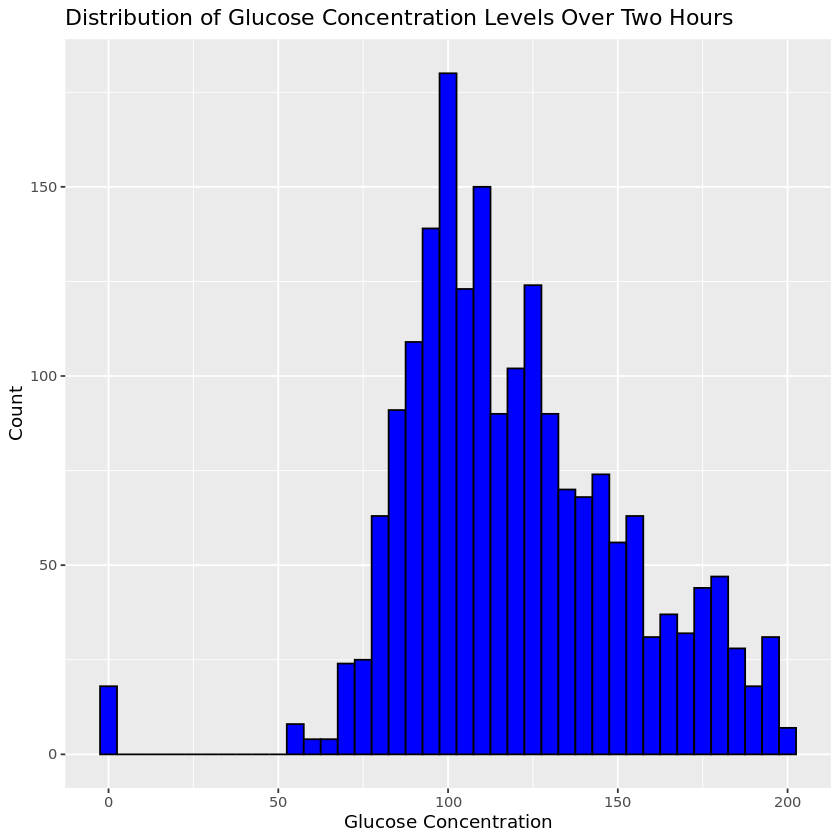

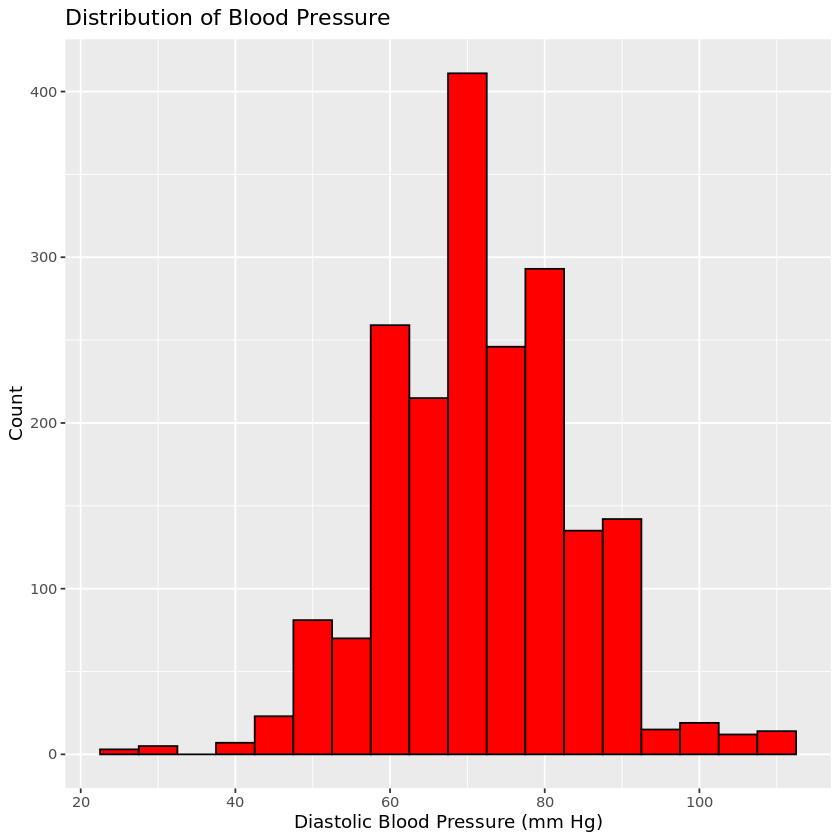

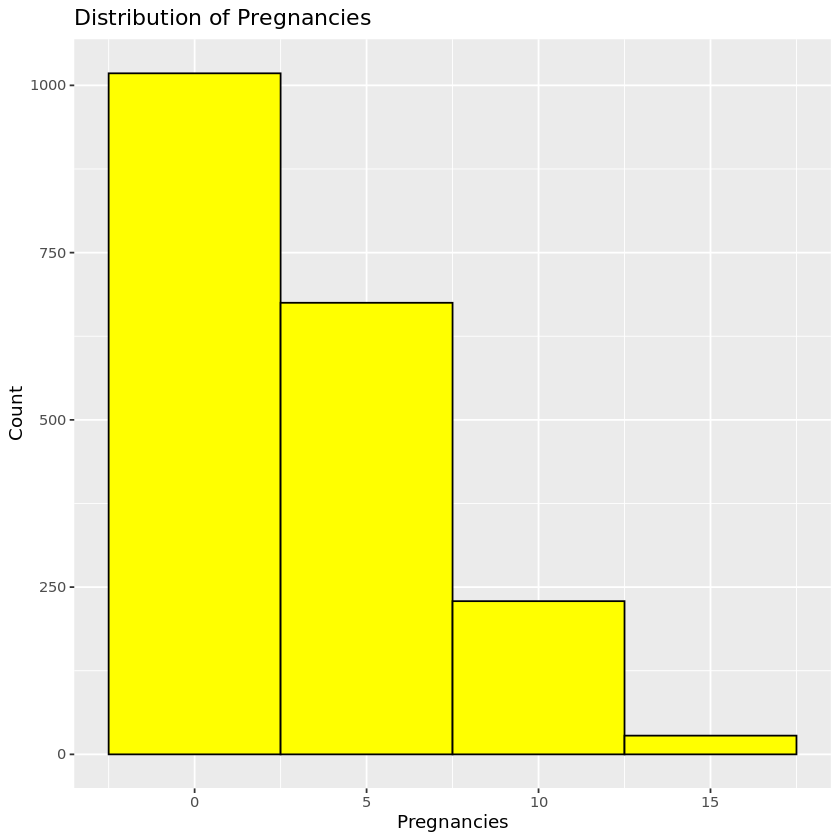

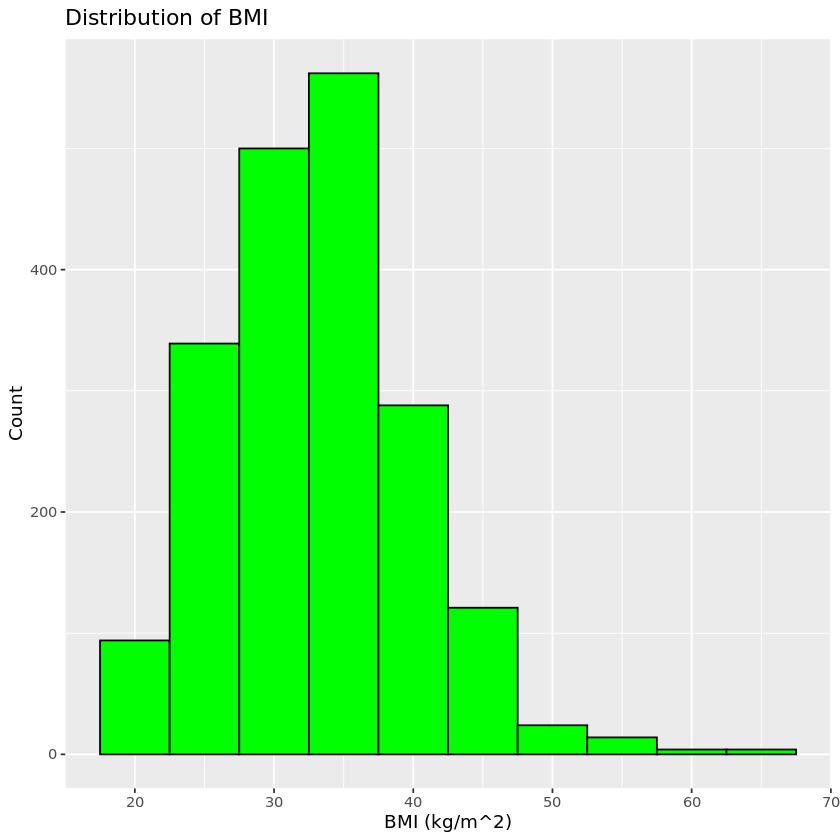

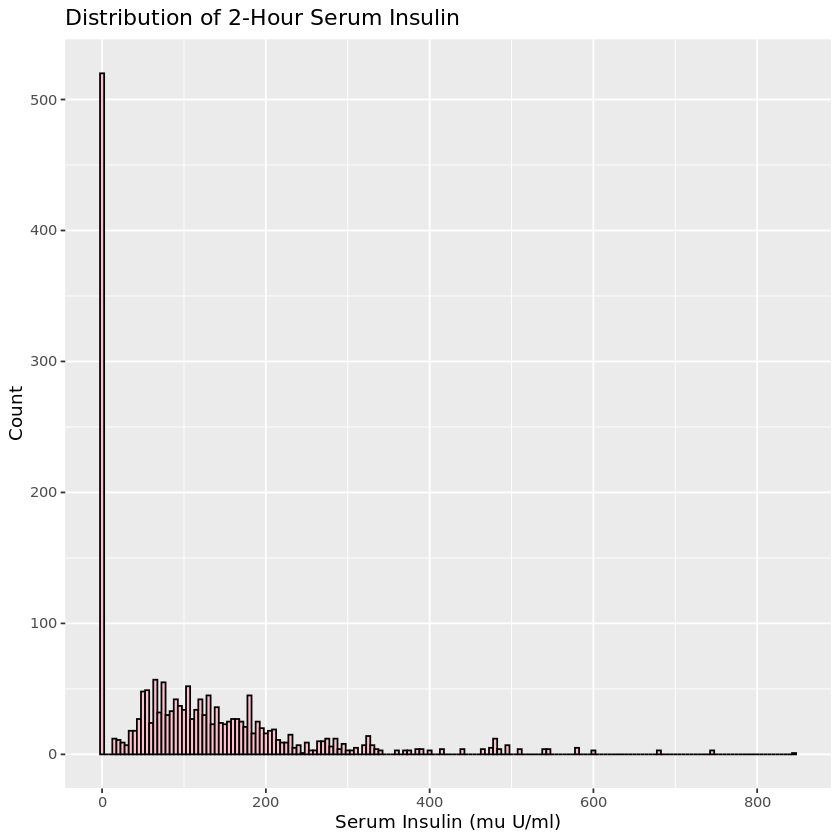

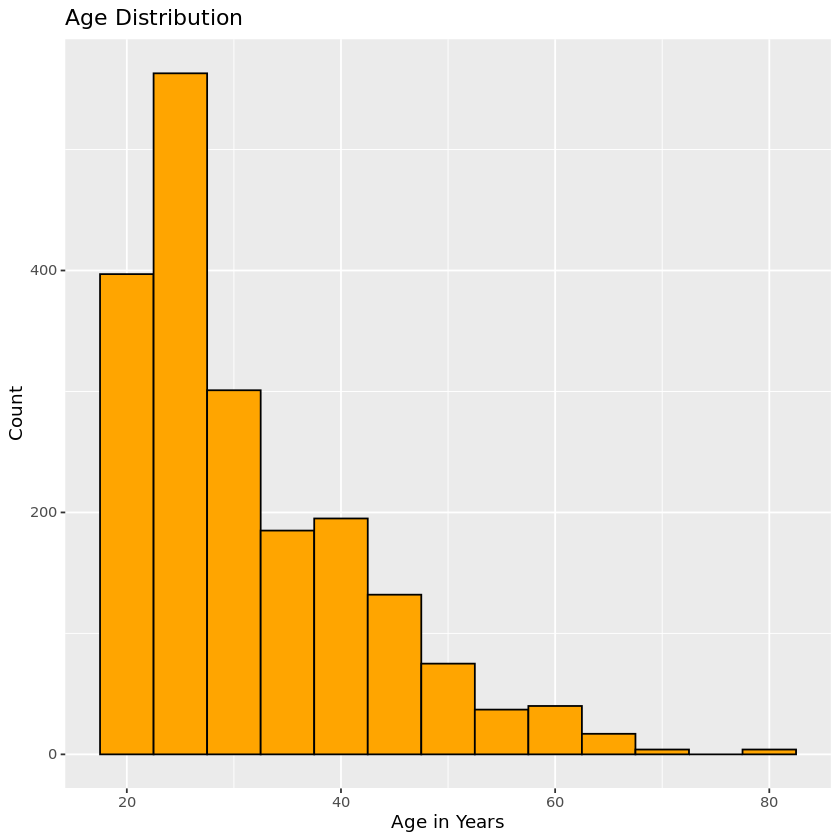

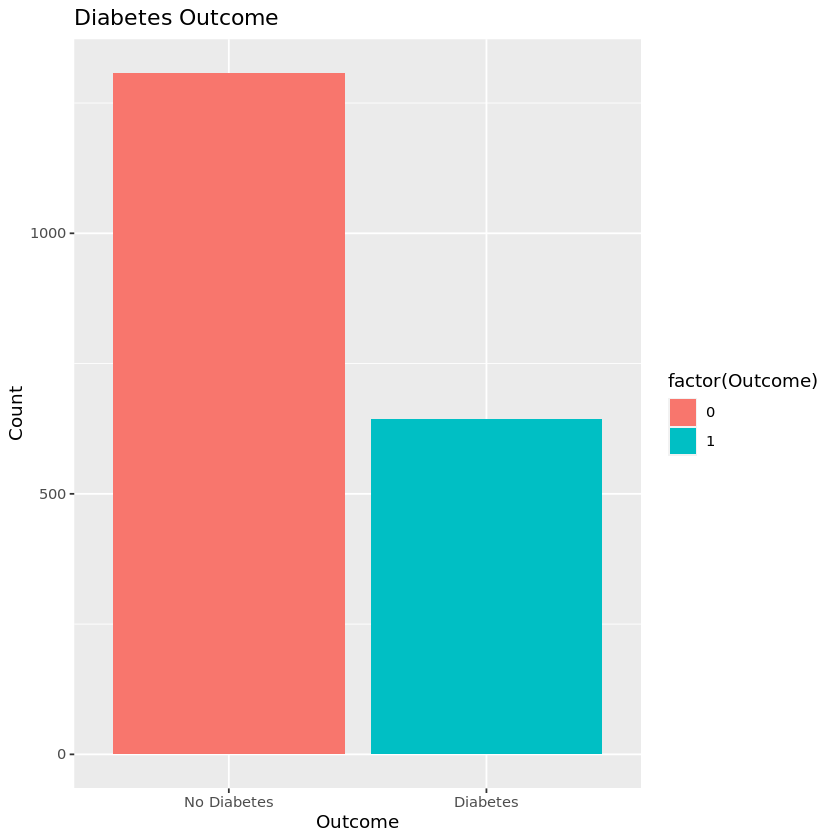

In [14]:
ggplot(diabetes_data_final, aes(x = Glucose)) +
  ggtitle("Distribution of Glucose Concentration Levels Over Two Hours") +
  labs(x = "Glucose Concentration", y = "Count") +
  geom_histogram(binwidth = 5, fill = "blue", color = "black")

ggplot(diabetes_data_final, aes(x = BloodPressure)) +
  ggtitle("Distribution of Blood Pressure") +
  labs(x = "Diastolic Blood Pressure (mm Hg)", y = "Count") +
  geom_histogram(binwidth = 5, fill = "red", color = "black")

ggplot(diabetes_data_final, aes(x = Pregnancies)) +
  ggtitle("Distribution of Pregnancies") +
  labs(x = "Pregnancies", y = "Count") +
  geom_histogram(binwidth = 5, fill = "yellow", color = "black")

ggplot(diabetes_data_final, aes(x = BMI)) +
  ggtitle("Distribution of BMI") +
  labs(x = "BMI (kg/m^2)", y = "Count") +
  geom_histogram(binwidth = 5, fill = "green", color = "black")

ggplot(diabetes_data_final, aes(x = Insulin)) +
  ggtitle("Distribution of 2-Hour Serum Insulin") +
  labs(x = "Serum Insulin (mu U/ml)", y = "Count") +
  geom_histogram(binwidth = 5, fill = "pink", color = "black")

ggplot(diabetes_data_final, aes(x = Age)) +
  ggtitle("Age Distribution") +
  labs(x = "Age in Years", y = "Count") +
  geom_histogram(binwidth = 5, fill = "orange", color = "black")

ggplot(diabetes_data_final, aes(x = factor(Outcome, labels = c("No Diabetes", "Diabetes")), fill = factor(Outcome))) + 
  ggtitle("Diabetes Outcome") + 
  geom_bar(stat = "count") +
  labs(x = "Outcome", y = "Count")

Next, let's assess the correlations of these variables.

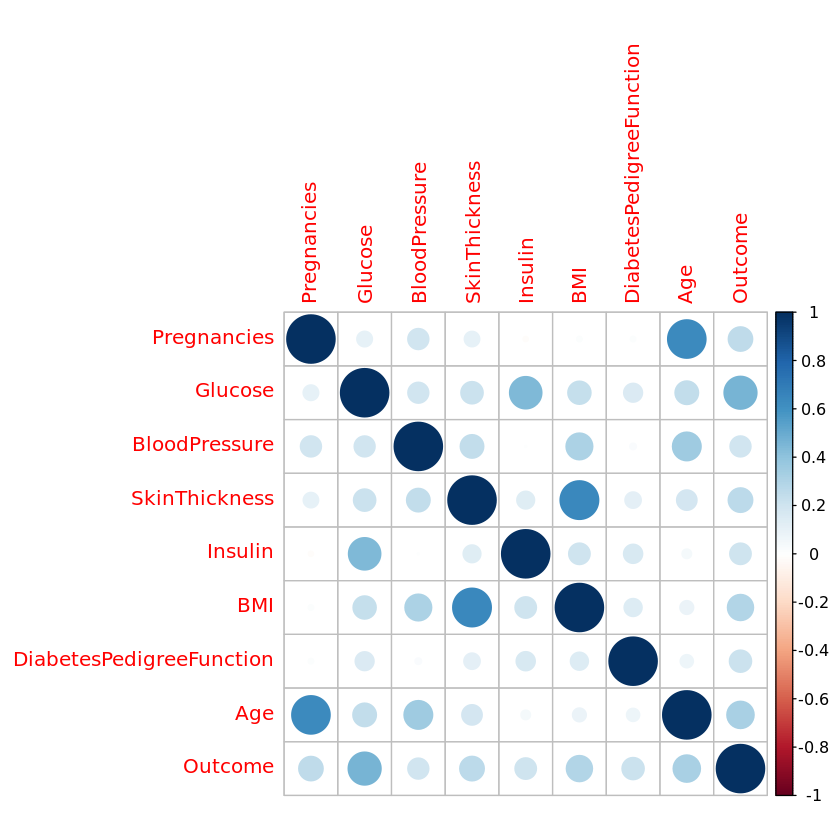

In [15]:
correlation_matrix <- cor(diabetes_data_final [,-1]) #exclude ID
corrplot(correlation_matrix, method = "circle")


## Model Building & Evaluation

Before we can build our predictive model, we need to split the dataset into two parts: 1.) a training set to train the model and 2.) a testing set to build and evaluate our model

In [16]:
# Split the dataset into training and testing sets (70% train, 30% test)
trainIndex <- createDataPartition(diabetes_data_final$Outcome, p = 0.7, list = FALSE)
trainData <- diabetes_data_final[trainIndex, ]
testData <- diabetes_data_final[-trainIndex, ]

In [17]:
summary(trainData)
summary(testData)

       Id        Pregnancies        Glucose      BloodPressure   
 Min.   :   1   Min.   : 0.000   Min.   :  0.0   Min.   : 24.00  
 1st Qu.: 699   1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00  
 Median :1376   Median : 2.000   Median :117.0   Median : 72.00  
 Mean   :1381   Mean   : 3.486   Mean   :120.8   Mean   : 71.74  
 3rd Qu.:2064   3rd Qu.: 5.000   3rd Qu.:142.0   3rd Qu.: 80.00  
 Max.   :2768   Max.   :17.000   Max.   :199.0   Max.   :110.00  
 SkinThickness      Insulin           BMI        DiabetesPedigreeFunction
 Min.   : 7.00   Min.   :  0.0   Min.   :18.20   Min.   :0.0850          
 1st Qu.:21.00   1st Qu.:  0.0   1st Qu.:28.00   1st Qu.:0.2600          
 Median :29.00   Median : 92.0   Median :32.90   Median :0.4150          
 Mean   :28.95   Mean   :117.4   Mean   :32.92   Mean   :0.5011          
 3rd Qu.:36.00   3rd Qu.:168.0   3rd Qu.:36.90   3rd Qu.:0.6580          
 Max.   :99.00   Max.   :846.0   Max.   :67.10   Max.   :2.4200          
      Age           

       Id        Pregnancies        Glucose      BloodPressure   
 Min.   :   4   Min.   : 0.000   Min.   :  0.0   Min.   : 24.00  
 1st Qu.: 710   1st Qu.: 1.000   1st Qu.: 97.0   1st Qu.: 64.00  
 Median :1414   Median : 2.000   Median :112.0   Median : 70.00  
 Mean   :1400   Mean   : 3.333   Mean   :118.2   Mean   : 71.35  
 3rd Qu.:2101   3rd Qu.: 5.000   3rd Qu.:139.0   3rd Qu.: 80.00  
 Max.   :2767   Max.   :15.000   Max.   :199.0   Max.   :110.00  
 SkinThickness      Insulin           BMI        DiabetesPedigreeFunction
 Min.   : 7.00   Min.   :  0.0   Min.   :18.20   Min.   :0.0850          
 1st Qu.:23.00   1st Qu.:  0.0   1st Qu.:28.00   1st Qu.:0.2570          
 Median :30.00   Median : 88.0   Median :33.20   Median :0.4080          
 Mean   :29.94   Mean   :103.2   Mean   :33.38   Mean   :0.4964          
 3rd Qu.:37.00   3rd Qu.:152.0   3rd Qu.:37.60   3rd Qu.:0.6310          
 Max.   :99.00   Max.   :579.0   Max.   :67.10   Max.   :2.4200          
      Age           

In [18]:
#LOGISTIC REGRESSION
#building and training the first model - excluding pregnancies and blood pressure
logistic_model <- glm(Outcome ~ Insulin + SkinThickness + Age + Glucose + DiabetesPedigreeFunction + BMI, data=trainData, family = "binomial")
summary(logistic_model)


Call:
glm(formula = Outcome ~ Insulin + SkinThickness + Age + Glucose + 
    DiabetesPedigreeFunction + BMI, family = "binomial", data = trainData)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.4276221  0.5597205 -16.843  < 2e-16 ***
Insulin                  -0.0007844  0.0006209  -1.263    0.206    
SkinThickness             0.0017949  0.0091645   0.196    0.845    
Age                       0.0499418  0.0067422   7.407 1.29e-13 ***
Glucose                   0.0349755  0.0028283  12.366  < 2e-16 ***
DiabetesPedigreeFunction  1.0682356  0.2219212   4.814 1.48e-06 ***
BMI                       0.0650704  0.0140437   4.633 3.60e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1724.9  on 1364  degrees of freedom
Residual deviance: 1244.9  on 1358  degrees of freedom
AIC: 1258.9

Number of Fisher Scoring iterations: 5


Now that we trained our first model, let's see how the model performs. Will it accurately predict diabetes in patients who actually have diabetes?

In [19]:
#predictions
pred_log <- predict(logistic_model, newdata=testData, type = "response")
predictions_class <- ifelse(pred_log > 0.5, 1, 0)
predictions_class <- factor(predictions_class, levels = c(0,1))
testData$Outcome <- factor(testData$Outcome, levels = c(0,1))
summary(pred_log)

confusion_matrix <- confusionMatrix(predictions_class, testData$Outcome)
print(confusion_matrix)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001448 0.096919 0.210663 0.321365 0.527662 0.990705 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 342  87
         1  46 110
                                         
               Accuracy : 0.7726         
                 95% CI : (0.7365, 0.806)
    No Information Rate : 0.6632         
    P-Value [Acc > NIR] : 4.824e-09      
                                         
                  Kappa : 0.4636         
                                         
 Mcnemar's Test P-Value : 0.0005235      
                                         
            Sensitivity : 0.8814         
            Specificity : 0.5584         
         Pos Pred Value : 0.7972         
         Neg Pred Value : 0.7051         
             Prevalence : 0.6632         
         Detection Rate : 0.5846         
   Detection Prevalence : 0.7333         
      Balanced Accuracy : 0.7199         
                                         
       'Positive' Class : 0              
                                         


Based off the output, we can see that the model has a sensitivity of 90%, which means that the model correctly identified diabetes among patients who have diabetes 90% of the time. However, the model has a specificity of roughly 53%, which indicates that the model isn't doing as great of a job at predicting no diabetes among patients who do not have diabetes. Overall, the model has a 77% accuracy.

These points being said, let's see if we can construct a better model.

In [20]:
#Model 2: Let's take put blood pressure and skin thickness back in
logistic_model2 <- glm(Outcome ~ Insulin + BloodPressure + SkinThickness + Pregnancies + Age + Glucose + DiabetesPedigreeFunction + BMI, data=trainData, family = "binomial")
summary(logistic_model2)

#predictions 2 - without Blood Pressure and skin thickness
pred_log2 <- predict(logistic_model2, newdata=testData, type = "response")
predictions_class2 <- ifelse(pred_log2 > 0.5, 1, 0)
predictions_class2 <- factor(predictions_class2, levels = c(0,1))
testData$Outcome <- factor(testData$Outcome, levels = c(0,1))
summary(pred_log2)

confusion_matrix2 <- confusionMatrix(predictions_class2, testData$Outcome)
print(confusion_matrix2)


Call:
glm(formula = Outcome ~ Insulin + BloodPressure + SkinThickness + 
    Pregnancies + Age + Glucose + DiabetesPedigreeFunction + 
    BMI, family = "binomial", data = trainData)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.2199731  0.6146656 -15.000  < 2e-16 ***
Insulin                  -0.0007854  0.0006252  -1.256   0.2090    
BloodPressure            -0.0015773  0.0066431  -0.237   0.8123    
SkinThickness             0.0007443  0.0091051   0.082   0.9348    
Pregnancies               0.1123317  0.0270230   4.157 3.23e-05 ***
Age                       0.0277127  0.0088285   3.139   0.0017 ** 
Glucose                   0.0357881  0.0028748  12.449  < 2e-16 ***
DiabetesPedigreeFunction  1.1162226  0.2257505   4.944 7.63e-07 ***
BMI                       0.0685376  0.0146276   4.686 2.79e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001218 0.099025 0.222182 0.320614 0.509693 0.990048 

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 346  90
         1  42 107
                                          
               Accuracy : 0.7744          
                 95% CI : (0.7383, 0.8076)
    No Information Rate : 0.6632          
    P-Value [Acc > NIR] : 2.754e-09       
                                          
                  Kappa : 0.4626          
                                          
 Mcnemar's Test P-Value : 4.298e-05       
                                          
            Sensitivity : 0.8918          
            Specificity : 0.5431          
         Pos Pred Value : 0.7936          
         Neg Pred Value : 0.7181          
             Prevalence : 0.6632          
         Detection Rate : 0.5915          
   Detection Prevalence : 0.7453          
      Balanced Accuracy : 0.7174          
                                          
       'Positive' Class : 0               
                              

After adding blood pressure and skin thickness back into the model, it looks like the model is performing better than the first one we made. This model has an improved sensitivity with 91% and an improved specificity with 54%. Additionally, the model has an improved acccuracy at 78%.

## Closing Thoughts

Thank you for checking out my first predictive modeling project! Although I'm still learning how to employ machine learning techniques, I had fun with this. If you have any feedback, please let me know!

## Author

V.B. Valdez